# Data Analysis Books Recommendations

## Web Scraping and EDA Project

### 1. Introduction
#### 1.1 Project Goal
In this project, we aim to recommend Data Analysis books based on data collected from Goodreads using web scraping.

#### 1.2 Tools
We will utilize various data analysis and visualization tools to accomplish this project such as 
- Python
- BeautifulSoup
- Requests
- Pandas
- Matplotlib
- Seaborn


#### 1.4 Features
The data features obtained from web scraping include 
- Book titles
- Authors
- Ratings
- Average ratings
- Publication years
- Editions

These features will serve as the foundation for our analysis and recommendations in this project.

### 2. Exploratory Analysis
#### 2.1 Pre-Processing
In the pre-processing stage, we performed the following steps to clean and prepare the dataset for analysis:

* Make changes to specific rows in the 'Title' column based on the 'Author' column's values.
* Convert the 'Rating' column from a string with commas to integers.
* Calculate a 'Weighted Rating' based on the product of 'Average Rating' and 'Rating'.
* Check for and remove missing values.
* Check for and remove duplicate entries.
* We will filter out rows with a 'Rating' of 0.

These steps ensured that the dataset was ready for meaningful analysis and recommendation.


#### 2.2 Inspecting Features
Analyze the characteristics and statistics of the Data Analysis books dataset.
- Explore the distribution of a quantitative variables
- Explore correlations between quantitative variables


#### 2.3 Most Popular Authors
We examine the authors of Data Analysis books.
- Most popular authors based on most ratings
- Most popular authors based on authors with the most published books


#### 2.4 Most Rated and Most Popular Books
We identified and presented the Data Analysis books that have received the highest ratings and are considered the most popular among readers.

### 3. Recommended Books
#### 3.1 Top 10 Most Recommended Data Analysis Books
We highlighted the top 10 Data Analysis books that are highly recommended based on the collected data based on highest ratings.

#### 3.2 Getting Books From The Recommended List
We created a clickable link that take you to the book page, where the book can be purchased

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\user\\Desktop\\projects\\Python\\data_analysis_books.csv")

# Display the first few rows of the DataFrame
df.head()

,Title,Author,Average Rating,Rating,Year Published,Edition
0,Python for Data Analysis,Wes McKinney,4.16,"2,178",2011,38
1,Bayesian Data Analysis,Andrew Gelman,4.22,522,1995,18
2,Data Analysis with Open Source Tools: A Hands-...,Philipp K. Janert,4.08,313,2010,10
3,"R Cookbook: Proven Recipes for Data Analysis, ...",Paul Teetor,4.05,439,2011,7
4,Data Analysis Using Regression and Multilevel/...,Andrew Gelman,4.35,274,2006,12


## 2. Exploratory Data Analysis
### 2.1  Pre-Processing

We will do the following for the task of data cleaning:
* Convert the 'Rating' column from a string with commas to integers.
* Calculate a 'Weighted Rating' based on the product of 'Average Rating' and 'Rating'.
* Check for and remove duplmissing values.
* Check for and remove duplicate entries.
* We will filter out rows with a 'Rating' of 0.

In [3]:
# Get the shape of the DataFrame
df.shape

(15678, 6)

In [4]:
## Check the data types of each column in our dataset
df.dtypes

Title              object
Author             object
Average Rating    float64
Rating             object
Year Published      int64
Edition             int64
dtype: object

In [5]:
# Convert the 'Rating' column from object to integer by removing commas
df["Rating"] = pd.to_numeric(df["Rating"].str.replace(",", ""))

# Create a new column for Weighted Rating
df['Weighted Rating'] = df['Average Rating'] * df['Rating']

In [6]:
# Check if the change was effected
df.dtypes

Title               object
Author              object
Average Rating     float64
Rating               int64
Year Published       int64
Edition              int64
Weighted Rating    float64
dtype: object

In [7]:
# Check for null values in the dataset
df.isnull().sum()

# Remove duplicate entries
df.drop_duplicates(keep='last', inplace=True)

# Select only rows with at least 1 Rating
df = df[df["Rating"] != 0]

 No null values remain in the dataset.
 Now, let's explore the dataset to get a better understanding.

In [8]:
len(df)

931

### 2.2 Inspecting Features

In [9]:
### Data Exploration

# Display summary statistics of the numerical columns
print(df.describe())

       Average Rating       Rating  Year Published     Edition  \
count      931.000000   931.000000      931.000000  931.000000   
mean         3.863416    17.060150     1192.510204    5.457573   
std          0.828782    85.381564      984.298902   14.508473   
min          1.000000     1.000000        0.000000    1.000000   
25%          3.500000     1.000000        0.000000    2.000000   
50%          4.000000     3.000000     1995.000000    3.000000   
75%          4.355000     8.000000     2009.000000    7.000000   
max          5.000000  2178.000000     2019.000000  407.000000   

       Weighted Rating  
count       931.000000  
mean         68.126606  
std         352.444782  
min           1.000000  
25%           5.000000  
50%          10.000000  
75%          32.960000  
max        9060.480000  


#### - Explore the distribution of a quantitative variables

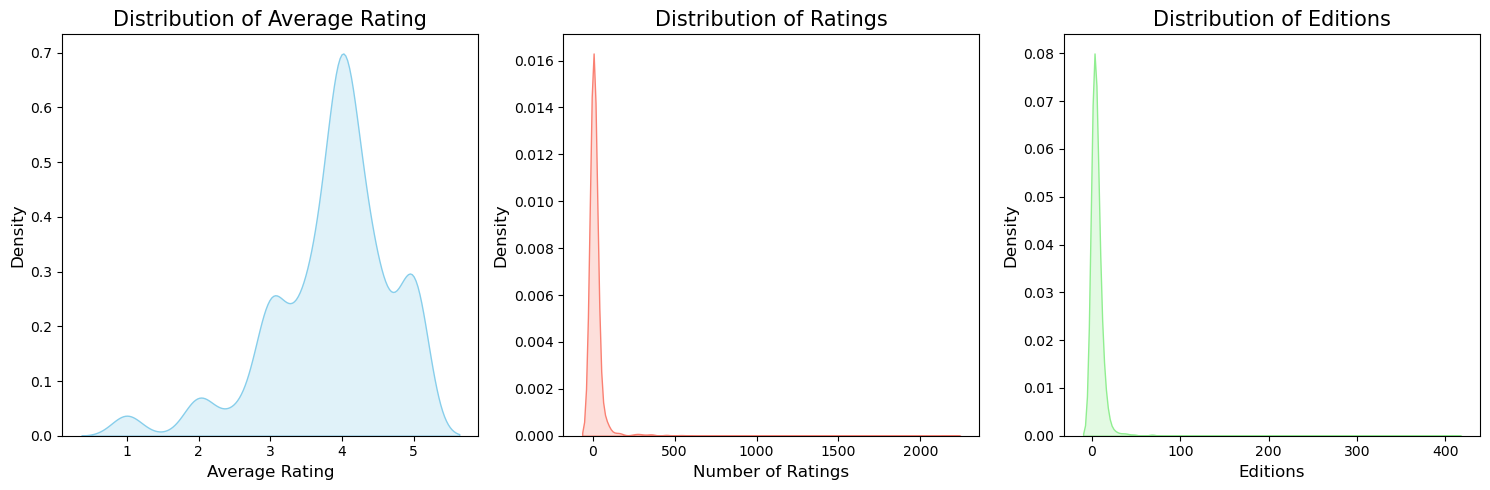

In [10]:
# Create subplots for distributions of key columns (Average Ratin, Rating, Edition)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Average Rating Distribution
sns.kdeplot(df["Average Rating"], shade=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Average Rating', fontsize=15)
axes[0].set_xlabel('Average Rating', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# Plot Number of Ratings Distribution
sns.kdeplot(df["Rating"], shade=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Ratings', fontsize=15)
axes[1].set_xlabel('Number of Ratings', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Plot Editions Distribution
sns.kdeplot(df["Edition"], shade=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Editions', fontsize=15)
axes[2].set_xlabel('Editions', fontsize=12)
axes[2].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

The visualization above shows that:
1. Most average ratings tend to be higher as they cluster around 4
2. Most books have less than 100 Ratings
3. Most books have up to 5 Editions.

#### - Explore correlations between quantitative variables

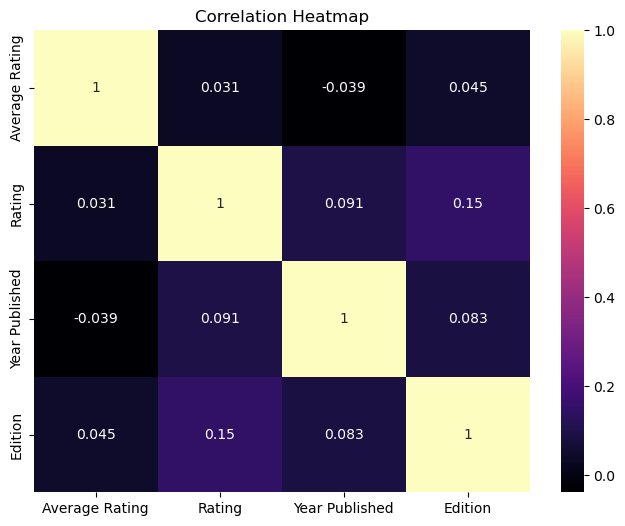

In [11]:
selected_columns = ['Average Rating', 'Rating', 'Year Published', 'Edition']
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='magma', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

The heatmap above shows that the variables don't seem to have a strong relationship.

### 2.3 Most popular authors (Top 10)

#### - Most popular authors based on top 10 highest ratings

In [12]:
most_popular = df[['Author', 'Rating']]
author_ratings = most_popular.groupby('Author')['Rating'].sum().reset_index()
top_10_most_popular = author_ratings.sort_values(by='Rating', ascending=False).head(10)
top_10_most_popular

,Author,Rating
754,Wes McKinney,2185
36,Andrew Gelman,796
286,Holden Karau,559
447,Mark Allen Weiss,469
26,Allen B. Downey,459
549,Paul Teetor,439
379,Julie Pallant,387
353,John K. Kruschke,360
265,Hadley Wickham,348
750,Wayne L. Winston,330


#### - Most popular authors based on authors with the most published books

In [13]:
authors_published_books = df.groupby('Author')['Title'].nunique().reset_index()
top_authors_published_books = authors_published_books.sort_values(by='Title', ascending=False)
top_authors_published_books.head(11)

,Author,Title
444,Marija J. Norusis,9
636,S. Christian Albright,9
750,Wayne L. Winston,8
647,Scott Hartshorn,5
37,Andrew Park,5
344,Joe Zhu,5
463,Matthew B. Miles,5
325,Jason Test,4
392,Ken Kleinman,4
18,Alan Bryman,4


#### Check if the number of books each author published has anything to do with in their popularity.

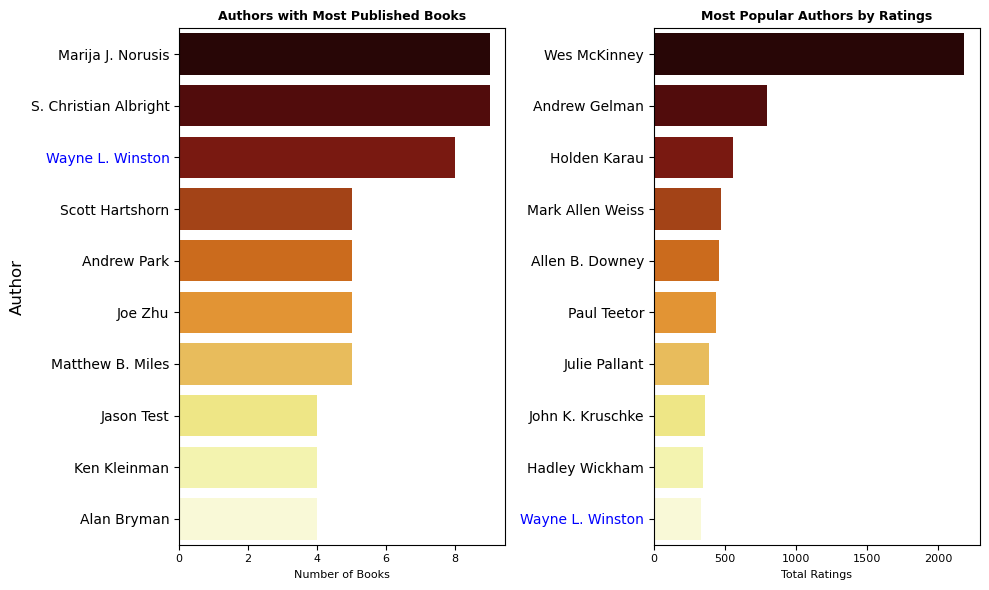

In [14]:
plt.figure(figsize=(10, 6))

# Subplot for authors with the most published books
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Title', y='Author', data=top_authors_published_books.head(10), palette='afmhot')
plt.ylabel('Author', fontsize=12)
plt.xlabel('Number of Books', fontsize=8)
plt.title('Authors with Most Published Books', fontsize=9, fontweight='bold')
plt.xticks(fontsize=8)
ax1.get_yticklabels()[2].set_color("blue")

# Subplot for most popular authors
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Rating', y='Author', data=top_10_most_popular, palette='afmhot')
plt.ylabel('')
plt.xlabel('Total Ratings', fontsize=8)
plt.title('Most Popular Authors by Ratings', fontsize=9, fontweight='bold')
plt.xticks(fontsize=8)
ax2.get_yticklabels()[9].set_color("blue");

plt.tight_layout()
plt.show()


As shown in the plot above, the number of books each author published did determine their popularity.

### 2.4 Most Rated vs Most Popular Books

In [15]:
# using set_table_attributes to display two dataframes side by side

from IPython.display import display_html 

# Create a Book_ID column
df['Book_ID'] = np.arange(1, len(df) + 1)

# Sort and select the top 10 most rated and most popular books
most_rated_books = df[['Book_ID', 'Average Rating']].sort_values(by='Average Rating', ascending=False).head(10)
most_popular_books = df[['Book_ID', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

# Define a function to highlight BookID in the table
def highlight_cols(s):
    color = 'green'
    return 'background-color: %s' % color

# applying styles and displaying

df1_styler = most_rated_books.reset_index().style.set_table_attributes(
                    "style='display:inline'").set_caption('Most Rated Books').applymap(highlight_cols, 
                    subset=pd.IndexSlice[:, ['Book_ID']]).format({'Avg. Rating': '{:,.1f}'})

df2_styler = most_popular_books.reset_index().style.set_table_attributes(
                        "style='display:inline'").set_caption('Most Popular Books').applymap(highlight_cols, 
                        subset=pd.IndexSlice[:, ['Book_ID']]).format({'Num. of Ratings': '{:,.1f}'})

display_html(df1_styler._repr_html_() + ' ' + df2_styler._repr_html_(), raw=True)



,index,Book_ID,Average Rating
0,1067,721,5.000000
1,1144,742,5.000000
2,1099,731,5.000000
3,559,447,5.000000
4,558,446,5.000000
5,1550,886,5.000000
6,542,437,5.000000
7,533,429,5.000000
8,526,423,5.000000
9,1542,883,5.000000


The tables show that the most rated books don't necessarily equate to the most popular ones. While these books boast higher average ratings, they don't necessarily have larger numbers of ratings. This aligns with the expectation that more ratings tend to bring about a wider range of critical and diverse opinions.

## 3. Recommended Books

#### 3.1 Top 10 Most Recommended Data Analysis Books

In [16]:
# Create a table of the top 10 most recommended Data Analysis books
most_recommended = df.sort_values(by='Weighted Rating', ascending=False).set_index('Title').head(10)

# Abbreviate long book titles
max_title_length = 50  
def abbreviate_title(title):
    if len(title) > max_title_length:
        return title[:max_title_length - 3] + '...'
    else:
        return title

most_recommended.index = most_recommended.index.map(abbreviate_title)

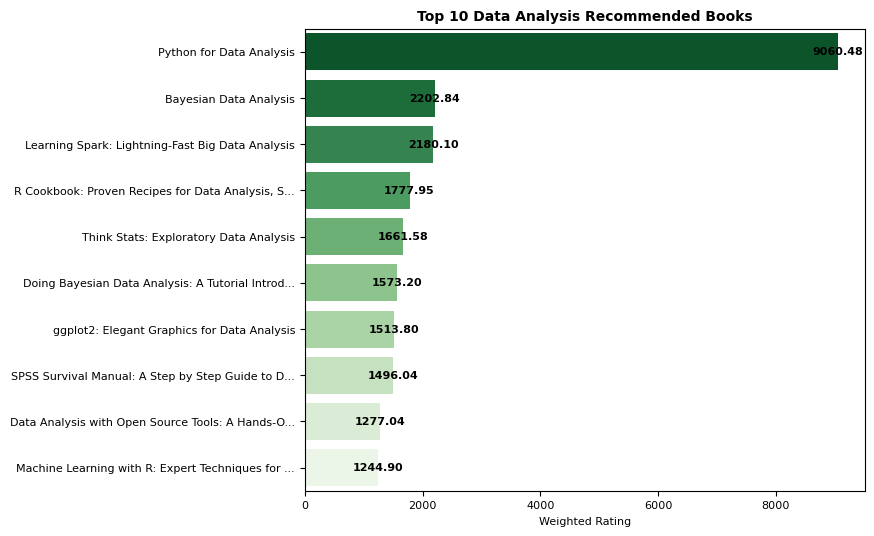

In [17]:
plt.figure(figsize=(8, 6))

ax = sns.barplot(x=most_recommended['Weighted Rating'], y=most_recommended.index, palette='Greens_r')
plt.ylabel('')
plt.xlabel('Weighted Rating', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Top 10 Data Analysis Recommended Books', fontsize=10, fontweight='bold')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.02, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=8, color='black', fontweight='bold')

plt.subplots_adjust(left=0.2, right=0.9)
plt.show()

In [18]:
# making a table with all information about the top 10 books

print("\n\nMost Recommended Books in Data Analysis Based on Goodreads Ratings")
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '12px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7ffff')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '12px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

most_recommended.drop(most_recommended[['Weighted Rating', 'Book_ID']],axis=1).reset_index().style.set_table_styles(
                                        styles).format({'Avg. Rating': '{:.1f}',
                                                        'Num. of Ratings': '{:,.0f}', 
                                                        'Editions': '{:.0f}', 
                                                        'Published Year': '{:.0f}'})




Most Recommended Books in Data Analysis Based on Goodreads Ratings


,Title,Author,Average Rating,Rating,Year Published,Edition
0,Python for Data Analysis,Wes McKinney,4.160000,2178,2011,38
1,Bayesian Data Analysis,Andrew Gelman,4.220000,522,1995,18
2,Learning Spark: Lightning-Fast Big Data Analysis,Holden Karau,3.900000,559,2013,16
3,"R Cookbook: Proven Recipes for Data Analysis, S...",Paul Teetor,4.050000,439,2011,7
4,Think Stats: Exploratory Data Analysis,Allen B. Downey,3.620000,459,2011,31
5,Doing Bayesian Data Analysis: A Tutorial Introd...,John K. Kruschke,4.370000,360,0,8
6,ggplot2: Elegant Graphics for Data Analysis,Hadley Wickham,4.350000,348,2009,15
7,SPSS Survival Manual: A Step by Step Guide to D...,Julie Pallant,4.110000,364,2001,35
8,Data Analysis with Open Source Tools: A Hands-O...,Philipp K. Janert,4.080000,313,2010,10
9,Machine Learning with R: Expert Techniques for ...,Brett Lantz,4.220000,295,2015,14


#### 3.2 Getting Books From The Recommended List

In [19]:
# List with prices and links

data = ['https://amzn.to/47fGTbQ',
        'https://amzn.to/49CPF4W',
       'https://amzn.to/40Hpvdl',
       'https://amzn.to/3ujxoK8',
        'https://amzn.to/3FXvVLR',
        'https://amzn.to/3G0keEi',
        'https://amzn.to/49M3Hl8',
        'https://amzn.to/47c51fn',
        'https://amzn.to/3QXEv3B',
        'https://amzn.to/3svjbcp']
        
        
        
def clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)


prices = ['USD 43.99 (Paper Back)', 'USD 67.26 (Hard Cover)', 'USD 43.99 (Paper Back)', 'USD 63.23 (Paper Back)', 'USD 29.99', 'USD 65.47 (Hard Cover)', 'USD 55.09 (Paper Back)', 'USD 51.99 (Paper Back)',
         'USD 18.74 (Paper Back)', 'USD 59.99 (Paper Back)']

to_buy = pd.DataFrame({
    'Book': most_recommended.index,
    'Author': most_recommended['Author'],
    'Price': prices,
    'Link to Book': data})

print("\n\nGetting Books from Recommended List")

to_buy.reset_index().drop('Title', axis=1).style.set_table_styles(styles).format({'Link to Book': clickable})



Getting Books from Recommended List


,Book,Author,Price,Link to Book
0,Python for Data Analysis,Wes McKinney,USD 43.99 (Paper Back),https://amzn.to/47fGTbQ
1,Bayesian Data Analysis,Andrew Gelman,USD 67.26 (Hard Cover),https://amzn.to/49CPF4W
2,Learning Spark: Lightning-Fast Big Data Analysis,Holden Karau,USD 43.99 (Paper Back),https://amzn.to/40Hpvdl
3,"R Cookbook: Proven Recipes for Data Analysis, S...",Paul Teetor,USD 63.23 (Paper Back),https://amzn.to/3ujxoK8
4,Think Stats: Exploratory Data Analysis,Allen B. Downey,USD 29.99,https://amzn.to/3FXvVLR
5,Doing Bayesian Data Analysis: A Tutorial Introd...,John K. Kruschke,USD 65.47 (Hard Cover),https://amzn.to/3G0keEi
6,ggplot2: Elegant Graphics for Data Analysis,Hadley Wickham,USD 55.09 (Paper Back),https://amzn.to/49M3Hl8
7,SPSS Survival Manual: A Step by Step Guide to D...,Julie Pallant,USD 51.99 (Paper Back),https://amzn.to/47c51fn
8,Data Analysis with Open Source Tools: A Hands-O...,Philipp K. Janert,USD 18.74 (Paper Back),https://amzn.to/3QXEv3B
9,Machine Learning with R: Expert Techniques for ...,Brett Lantz,USD 59.99 (Paper Back),https://amzn.to/3svjbcp


# Conclusion

In this Data Analysis book recommendation project, we leverage web scraping and exploratory data analysis to provide valuable insights and recommendations for data analyst seeking to enhance their knowledege in data analysis. Our analysis of the Goodreads data led to several key takeaways.

We began by setting clear project goals and describing the tools and techniques used in data collection. Web scraping was employed to extract data on data analysis books from Goodreads, and this data was subsequently pre-processed to ensure its quality and reliability. We checked various features, including book titles, authors, ratings, to gain a comprehensive understanding of the data analysis books.

Through exploratory analysis, we identified the most rated and most popular data analysis books, getting to know the preferences and choices of readers in data analysis. Furthermore, we highlighted the authors and their contributions to data analysis domain, revealing the voices that resonate most with readers.

At the end of our project, we presented the top 10 most recommended books based on our analysis of the collected data. These recommendations serve as a valuable resource, offering insights into the books that have had a profound impact on others in the field of data analysis.

# Key Takeaways

1. **Data-Driven Insights:** Data analysis, including web scraping and exploratory data analysis, provides a data-driven approach to understanding data analysis book preferences. By leveraging such insights, readers can make informed decisions when choosing their next book.

2. **Author Insights**: We've uncovered valuable information about prolific authors and their most popular works. This sheds light on the authors shaping the field of data analysis.

3. **Readers' Choice:** The most rated and popular books identified in our analysis reflect the choices and recommendations of a broad readership. These books have struck a chord with readers and are worth exploring.

4. **Top Recommendations:** Our project concluded with a list of the top 10 most recommended books. These recommendations serve as a curated guide for those looking to improve their knowledege in the field of data analysis
